In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Embedding, Dropout, Activation, Reshape

In [ ]:
dataset = pd.read_csv('sample_data/Test data.csv')

In [ ]:
dataset.tail()

,Time,T(t-15),T(t-30),T(t-45),T(t-60),T((t-15)-(t-30)),T((t-30)-(t-45)),T((t-45)-(t-60)),Time of day,Day,Week,Weekday,Month,Weather,Tt
5658,10:30:00 AM,6.67,6.76,6.93,6.54,-0.09,-0.17,0.39,91,59,1,5,2,1,6.67
5659,10:45:00 AM,6.63,6.67,6.76,6.93,-0.04,-0.09,-0.17,92,59,1,5,2,2,6.63
5660,11:00:00 AM,6.79,6.63,6.67,6.76,0.16,-0.04,-0.09,93,59,1,5,2,3,6.79
5661,11:15:00 AM,55.76,6.79,6.63,6.67,48.97,0.16,-0.04,94,59,1,5,2,1,55.76
5662,11:30:00 AM,56.54,55.76,6.79,6.63,0.78,48.97,0.16,95,59,1,5,2,2,56.54


In [ ]:
dataset.isnull().sum()

Time                0
T(t-15)             0
T(t-30)             0
T(t-45)             0
T(t-60)             0
T((t-15)-(t-30))    0
T((t-30)-(t-45))    0
T((t-45)-(t-60))    0
Time of day         0
Day                 0
Week                0
Weekday             0
Month               0
Weather             0
Tt                  0
dtype: int64

In [ ]:
dataset.shape

(5663, 15)

In [ ]:
dataset= dataset.drop('Time', 1)
dataset

In [ ]:
dataset

,T(t-15),T(t-30),T(t-45),T(t-60),T((t-15)-(t-30)),T((t-30)-(t-45)),T((t-45)-(t-60)),Time of day,Day,Week,Weekday,Month,Weather,Tt
0,9.33,9.14,10.46,9.93,0.19,-1.32,0.53,1,1,1,5,1,1,9.33
1,9.39,9.33,9.14,10.46,0.06,0.19,-1.32,2,1,1,5,1,2,9.39
2,8.78,9.39,9.33,9.14,-0.61,0.06,0.19,3,1,1,5,1,3,8.78
3,8.71,8.78,9.39,9.33,-0.07,-0.61,0.06,4,1,1,5,1,1,8.71
4,8.86,8.71,8.78,9.39,0.15,-0.07,-0.61,5,1,1,5,1,2,8.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,6.67,6.76,6.93,6.54,-0.09,-0.17,0.39,91,59,1,5,2,1,6.67
5659,6.63,6.67,6.76,6.93,-0.04,-0.09,-0.17,92,59,1,5,2,2,6.63
5660,6.79,6.63,6.67,6.76,0.16,-0.04,-0.09,93,59,1,5,2,3,6.79
5661,55.76,6.79,6.63,6.67,48.97,0.16,-0.04,94,59,1,5,2,1,55.76


In [ ]:
dataset.shape

(5663, 14)

In [ ]:
#dataset.loc[188]['Time of day']

96.0

In [ ]:
#num = 97
#num//96

1

In [ ]:
len(dataset['Time of day'])

5663

In [ ]:
# num = 97
# for pos in range(189, len(dataset['Time of day'])):
#   if num%96 == 0:
#     dataset['Time of day'][pos] = 96
#   else:
#     dataset['Time of day'][pos] = num%96
#   num += 1

In [ ]:
# # Filling missing numeric data in the dataset with mean
# for i in ['T(t-15)','T(t-30)','T(t-45)','T(t-60)','Tt']:
#     dataset[i].fillna(dataset[i].mean(),inplace=True)

In [ ]:
dataset.isnull().sum()

T(t-15)             0
T(t-30)             0
T(t-45)             0
T(t-60)             0
T((t-15)-(t-30))    0
T((t-30)-(t-45))    0
T((t-45)-(t-60))    0
Time of day         0
Day                 0
Week                0
Weekday             0
Month               0
Weather             0
Tt                  0
dtype: int64

In [ ]:
dataset

,T(t-15),T(t-30),T(t-45),T(t-60),T((t-15)-(t-30)),T((t-30)-(t-45)),T((t-45)-(t-60)),Time of day,Day,Week,Weekday,Month,Weather,Tt
0,9.33,9.14,10.46,9.93,0.19,-1.32,0.53,1,1,1,5,1,1,9.33
1,9.39,9.33,9.14,10.46,0.06,0.19,-1.32,2,1,1,5,1,2,9.39
2,8.78,9.39,9.33,9.14,-0.61,0.06,0.19,3,1,1,5,1,3,8.78
3,8.71,8.78,9.39,9.33,-0.07,-0.61,0.06,4,1,1,5,1,1,8.71
4,8.86,8.71,8.78,9.39,0.15,-0.07,-0.61,5,1,1,5,1,2,8.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,6.67,6.76,6.93,6.54,-0.09,-0.17,0.39,91,59,1,5,2,1,6.67
5659,6.63,6.67,6.76,6.93,-0.04,-0.09,-0.17,92,59,1,5,2,2,6.63
5660,6.79,6.63,6.67,6.76,0.16,-0.04,-0.09,93,59,1,5,2,3,6.79
5661,55.76,6.79,6.63,6.67,48.97,0.16,-0.04,94,59,1,5,2,1,55.76


In [ ]:
# Data preprocessing
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
#from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [1]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

def evaluate_model_CNN(X_train, X_val, y_train, y_val):
  #model = ANN
  timesteps=125
  dims=4
  model=Sequential()
#   model.add(LSTM(24,
#   dropout=0.2,return_sequences=True,
#   activation='tanh', recurrent_activation='tanh',recurrent_dropout=0.2,input_shape=(1,X_train.shape[2])))
#   model.add(LSTM(12, 
#   activation='tanh', recurrent_activation='tanh',
#   dropout=0.2,recurrent_dropout=0.2))
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)))
  #model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
  # model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
  # model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
  model.add(Dropout(0.5))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(keras.layers.Dense (256,input_shape=(X_train.shape[1],),activation='relu')) #input layer
  #model.add(keras.layers.Dense (128,activation='relu')) #hidden
  model.add(keras.layers.Dense (128,activation='relu')) #hidden
  model.add(keras.layers.Dense (64,activation='relu')) #hidden
  #model.add(keras.layers.Dense (64,activation='relu')) #hidden
  model.add(keras.layers.Dense (32,activation='relu')) #hidden
  model.add(keras.layers.Dense (16,activation='relu')) #hidden
  model.add(keras.layers.Dense (1)) #output
  #model.add(keras.layers.Dense (256,activation='relu')) #input layer
  # model.add(Dropout(0.2))
  # model.add(keras.layers.Dense (128,activation='relu')) #input layer
  # model.add(Dropout(0.2))
  # model.add(keras.layers.Dense (64,activation='relu')) #hidden
  # model.add(Dropout(0.3))
  # model.add(keras.layers.Dense (32,activation='relu')) #hidden
  # model.add(Dropout(0.3))
  # model.add(keras.layers.Dense (16,activation='relu')) #hidden
  # model.add(Dropout(0.3))
  # model.add(keras.layers.Dense (1,activation='softmax')) #output
  epochs = 400
  batch_size = 64
  model.compile(loss='mse', optimizer='adam')
  history = model.fit(X_train, y_train, validation_data = (X_val,y_val), epochs=100,batch_size=128,verbose=1)
  return history, model

In [ ]:
n_folds = 1
cv_scores, model_history = list(), list()
#for _ in range(n_folds):  
  # split data
  # x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = np.random.randint(1,1000, 1)[0])
  # evaluate model
  # print(X_train.shape)
  # print(y_train.shape)
  # print(X_test.shape)
  # print(y_test.shape)
model = tf.keras.Sequential()
history, model= evaluate_model_CNN(X_train, X_test, y_train, y_test)

Epoch 1/100
36/36 [==============================] - 1s 7ms/step - loss: 6569.6069 - val_loss: 4555.3618
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 1131.1995 - val_loss: 901.7568
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 274.3838 - val_loss: 1180.6366
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 213.4173 - val_loss: 1182.3566
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 199.8672 - val_loss: 976.4273
Epoch 6/100
36/36 [==============================] - 0s 4ms/step - loss: 188.4488 - val_loss: 1117.7211
Epoch 7/100
36/36 [==============================] - 0s 4ms/step - loss: 199.8488 - val_loss: 1206.1757
Epoch 8/100
36/36 [==============================] - 0s 4ms/step - loss: 160.0717 - val_loss: 1179.5150
Epoch 9/100
36/36 [==============================] - 0s 4ms/step - loss: 178.2486 - val_loss: 1041.6589
Epoch 10/100
36/36 [==============================] - 0s 4ms/ste

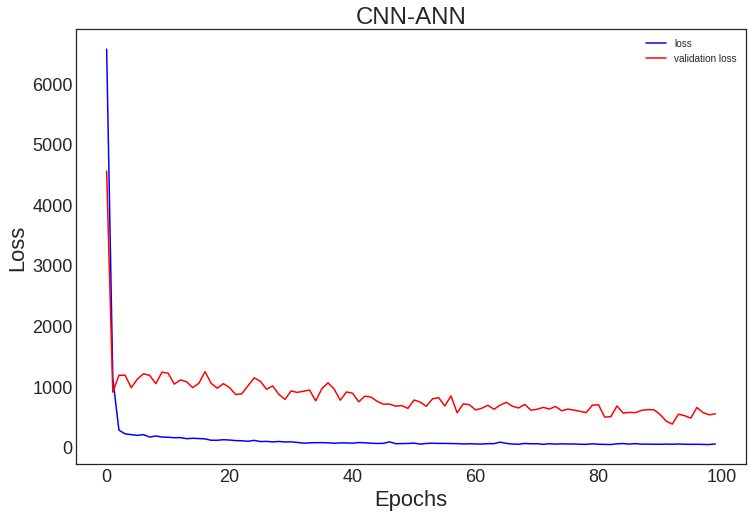

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
fig = plt.subplots(1,1, figsize = (12, 8))
# fig = plt.figure()
plt.plot(history.history['loss'],'b')
plt.plot(history.history['val_loss'],'r')
plt.title('CNN-ANN',fontsize = 24)
plt.xlabel('Epochs',fontsize =22)
plt.ylabel('Loss',fontsize = 22)
plt.xticks(fontsize =18)
plt.yticks(fontsize =18)
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
plt.savefig('CNN-ANN.png', dpi=300)

In [ ]:
model = Sequential()
model.add(keras.layers.Dense (256,input_shape=(X_train.shape[1],),activation='relu')) #input layer
model.add(keras.layers.Dense (128,activation='relu')) #hidden
model.add(keras.layers.Dense (64,activation='relu')) #hidden
model.add(keras.layers.Dense (32,activation='relu')) #hidden
model.add(keras.layers.Dense (16,activation='relu')) #hidden
model.add(keras.layers.Dense (1)) #output
model.compile(
    optimizer = 'adam',
    loss = 'mse'
)
model.fit(X_train,y_train,epochs=50,validation_data=(X_test, y_test))

Epoch 1/50
26215/26215 [==============================] - 86s 3ms/step - loss: 88.2977 - val_loss: 0.0946
Epoch 2/50
26215/26215 [==============================] - 85s 3ms/step - loss: 2.8081 - val_loss: 0.3823
Epoch 3/50
26215/26215 [==============================] - 83s 3ms/step - loss: 1.1927 - val_loss: 0.0412
Epoch 4/50
26215/26215 [==============================] - 84s 3ms/step - loss: 0.5672 - val_loss: 0.9704
Epoch 5/50
26215/26215 [==============================] - 84s 3ms/step - loss: 0.9790 - val_loss: 0.0465
Epoch 6/50
26215/26215 [==============================] - 85s 3ms/step - loss: 0.4613 - val_loss: 0.0069
Epoch 7/50
26215/26215 [==============================] - 87s 3ms/step - loss: 0.5499 - val_loss: 0.0238
Epoch 8/50
26215/26215 [==============================] - 86s 3ms/step - loss: 0.5492 - val_loss: 0.5683
Epoch 9/50
26215/26215 [==============================] - 86s 3ms/step - loss: 0.5999 - val_loss: 0.4819
Epoch 10/50
26215/26215 [=============================

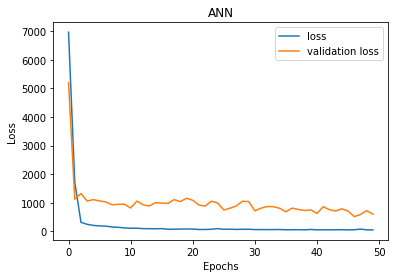

In [ ]:
import matplotlib.pyplot as plt
fig = plt.gcf()
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('ANN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()
fig.savefig('ANN.png', dpi=100)

In [1]:
y_predict = model.predict(X_test)
print(y_predict)

NameError: ignored

In [ ]:
len(y_predict)

1133

In [ ]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, y_predict))
print('MAPE: ', metrics.mean_absolute_error(y_test, y_predict)*100)
print('MSE: ', metrics.mean_squared_error(y_test, y_predict))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('RMAE: ', np.sqrt(metrics.mean_absolute_error(y_test, y_predict)))
print('R2: ', metrics.r2_score(y_test, y_predict))

MAE:  11.272271286761562
MAPE:  1127.227128676156
MSE:  543.8711250379484
RMSE:  23.321044681530637
RMAE:  3.3574203321540725
R2:  0.9128430415316529
